# Multiple Linear Regression Project - Chicagoland Real Estate


## Modelling the Relationship Between Sale Price, Property Features, and Cash Flow




## Project Overview


The aim of this project is to explore Chicagoland-area real estate data, and to predict the value of a 2-4 unit apartment building based on a handful of reported features, as well as some engineered features; specifically the estimated monthly cash flow of the property given a set of assumptions.



###  Multiple Linear Regression


Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for supervised learning regression problems where we try to predict a continuous variable.

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ a Multiple Linear Regression technique where I have multiple independent variables, and one dependent, or "target", variable. It is the simplest form of Regression where we find the "best fit" straight line to predict values of new data based on existing data.

## The Problem

2-4 unit apartment builds have been a popular investment for many individuals in the Chicagoland area. There are many reasons for this;
1. They can be purchased with traditional mortgage loans, and are therefore more accessible to individual investors.
2. If you find a good deal, you can generate cash flow on a monthly basis from rental income.
3. They give you flexiblity; many investors choose to live in one of the units in their building.

Due to increasing real estate costs, increasing property tax, and a supply/demand inbalance in favor of sellers, the number of good deals in this category (2-4 units) are few and far between.

This project seeks to answer two questions;
1. Is it possible to use property features and estimated cash flow to predict a 'fair' sale price for an apartment building?
2. How does estimated monthly cash flow relate to sale price?


## Software Information

This project uses Python 3.0 in Anaconda's Jupyter Notebook environment.

## Python Libraries

The basic Python libraries used in this project are:-

 •	Numpy – A library that provides a fast numerical array structure with powerful operating functions.
 
 •	Pandas – A library that provides tools for data storage, manipulation, and analysis tasks.
 
 •	Scikit-Learn – A machine learning library in Python.
 
 •	Matplotlib – The basic plotting library in Python. It provides tools for visualizing data.
 
 •	Seaborn – An advanced plotting library built on Matplotlib. It provides tools for making some advanced regression plots.
 
 •	SciPy – A library with a wide range of mathematical formulas.
 
 •	Pickle – A library that allows for packaging and compressing of Pandas dataframes. Need this to access the dataset.


In [141]:
# Import necessary libraries

import pickle
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## About the Dataset

The data was downloaded from MRED MLS, the official real estate database used by real estate appraisers, agents, and investors.

A subscription is required to log in;
https://connectmls-api.mredllc.com/

The data includes 5891 2-4 unit properties, sold from 2012 to 2019, in the Chicagoland area (to exclude the South, South West, and West sides of Chicago).

In [195]:
# Import the data

df_original = pd.read_pickle('2012 to 2019 Multiunit Chicagoland.pkl')
df = df_original.copy()

## Exploratory Data Analysis

### Shape and Features

The shape of the data shows that there are 5891 'observations', and 27 hand picked features. Some of the features are dummy variables for attributes of the building, like amenities and the age of the building. Some features were calculated using outside data sources. More info on the custom features below.

In [196]:
# View the number of rows and columns in df

print(f'Shape of the data: Rows - {df.shape[0]}, Columns - {df.shape[1]}')

Shape of the data: Rows - 5891, Columns - 27


In [197]:
# View the top 5 rows of df

df.head(5)

,# Garage Spaces,# Parking Spaces,Total_BRs,Total_Bath,Rehab,Gated Entry,Park/Playground,Pond/Lake,Pool,Tennis Courts,...,Porch,Roof Deck,Screened Deck,Screened Patio,1 to 25 Yrs Old,26 to 50 Yrs Old,51 to 100 Yrs Old,Mean Annual Income,List Price,Monthly_Profit
0,2.0,0.0,3.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,84376.0,110000,258
1,1.0,0.0,4.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,76044.0,180000,-357
2,0.0,3.0,4.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,69674.0,149900,23
3,0.0,3.0,3.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,82088.0,159000,644
4,3.0,0.0,4.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,82088.0,205000,-111


In [198]:
# View dataframe summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 27 columns):
# Garage Spaces         5891 non-null float64
# Parking Spaces        5891 non-null float64
Total_BRs               5891 non-null float64
Total_Bath              5891 non-null float64
Rehab                   5891 non-null int64
Gated Entry             5891 non-null int64
Park/Playground         5891 non-null int64
Pond/Lake               5891 non-null int64
Pool                    5891 non-null int64
Tennis Courts           5891 non-null int64
Balcony                 5891 non-null int64
Deck                    5891 non-null int64
Door Monitored By TV    5891 non-null int64
Fire Pit                5891 non-null int64
Hot Tub                 5891 non-null int64
Outdoor Grill           5891 non-null int64
Patio                   5891 non-null int64
Porch                   5891 non-null int64
Roof Deck               5891 non-null int64
Screened Deck           5891 non-null int64
Scree

In [199]:
# View descriptive statistics

df.describe()

,# Garage Spaces,# Parking Spaces,Total_BRs,Total_Bath,Rehab,Gated Entry,Park/Playground,Pond/Lake,Pool,Tennis Courts,...,Porch,Roof Deck,Screened Deck,Screened Patio,1 to 25 Yrs Old,26 to 50 Yrs Old,51 to 100 Yrs Old,Mean Annual Income,List Price,Monthly_Profit
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5.891000e+03,5891.000000
mean,1.601731,0.958072,5.991682,3.091326,0.324733,0.038703,0.118656,0.005602,0.020879,0.022407,...,0.127483,0.013071,0.000679,0.000849,0.012562,0.079613,0.501952,84111.866406,5.375888e+05,-742.142930
std,1.095791,1.934437,1.923609,1.230958,0.468315,0.192903,0.323410,0.074641,0.142992,0.148016,...,0.333541,0.113588,0.026051,0.029123,0.111382,0.270716,0.500039,17159.313446,2.995448e+05,13959.906793
min,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30057.000000,0.000000e+00,-811696.000000
25%,0.000000,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71500.000000,3.490000e+05,-841.000000
50%,2.000000,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,76044.000000,4.690000e+05,-429.000000
75%,2.000000,1.000000,7.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,99265.000000,6.746750e+05,-39.000000
max,12.000000,18.000000,15.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,180180.000000,2.995000e+06,22628.000000


## Unique Metrics and Transformations

1. Imputed missing unit-level rent values using the rent of reported units in the same building, divided by the number of bedrooms of that unit, then multiplied by the number of bedrooms in the unit missing a rent field.

2. Estimated average Net Operating Income (NOI) by taking the average of 20% of the observations that were reported, then applying that average to the rest of the dataset. This ended up being 33%, or NOI being 2/3rds of total rental income. I confirmed with specialists in Real Estate appraising that this is an accurate estimated.

3. Estimated Monthly Cash Flow, or 'Monthly Profit', was calculated by taking monthly estimated NOI and subtracting monthly taxes, estimated insurance, and mortgage principle and interest using the below assumptions;
    * 20% down payment on total sale price.
    * 3.5% interest rate
    * 30 year mortgage term


4. Average Annual Income refers to the average income of the population located in the same zipcode as the property. This was calculated using US Census Bureau data on national income statistics by zipcode.

## Independent and Dependent Variables


In this project, I refer to the independent variables as 'features' and dependent variable as 'target'. These variables are abreviated to X and y, respectively.

In [200]:
# Declare feature variable and target variable

X = df.drop(columns='List Price')
y = df['List Price']

## Train Test Split

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4123, 26)
(1768, 26)
(4123,)
(1768,)


## Seperating Numerical and Categorical Features

In [202]:
num = ['Mean Annual Income', '# Garage Spaces', '# Parking Spaces', 'Total_BRs', 'Total_Bath', 'Monthly_Profit']

In [203]:
X_train_num = X_train[num]
X_train_cat = X_train.drop(columns=num)
X_test_num = X_test[num]
X_test_cat = X_test.drop(columns=num)

## Standardize & Drop Outliers of Numerical Features

In [204]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Standardize Train Set
X_train_num_stand = pd.DataFrame(ss.fit_transform(X_train_num))
X_train_num_stand.set_index(X_train_num.index, inplace=True)
X_train_num_stand.columns = X_train_num.columns
X_train_num_stand = X_train_num_stand[(np.abs(stats.zscore(X_train_num_stand)) < 2.5).all(axis=1)]

# Standardize Test Set
X_test_num_stand = pd.DataFrame(ss.fit_transform(X_test_num))
X_test_num_stand.set_index(X_test_num.index, inplace=True)
X_test_num_stand.columns = X_test_num.columns
X_test_num_stand = X_test_num_stand[(np.abs(stats.zscore(X_test_num_stand)) < 2.5).all(axis=1)]

## Recombine Numerical & Categorical

In [205]:
X_train_cat = X_train_cat.loc[X_train_num_stand.index]
y_train = y_train.loc[X_train_num_stand.index]
X_train_stand = X_train_cat.join(X_train_num_stand)
print(X_train_stand.shape)
print(y_train.shape)

(3596, 26)
(3596,)


In [206]:
X_test_cat = X_test_cat.loc[X_test_num_stand.index]
y_test = y_test.loc[X_test_num_stand.index]
X_test_stand = X_test_cat.join(X_test_num_stand)
print(X_test_stand.shape)
print(y_test.shape)

(1561, 26)
(1561,)


## Visual EDA

Below are two visualizations of the two most important features, 'Estimated Monthly Cash Flow' and 'Average Annual Income of Zipcode'.

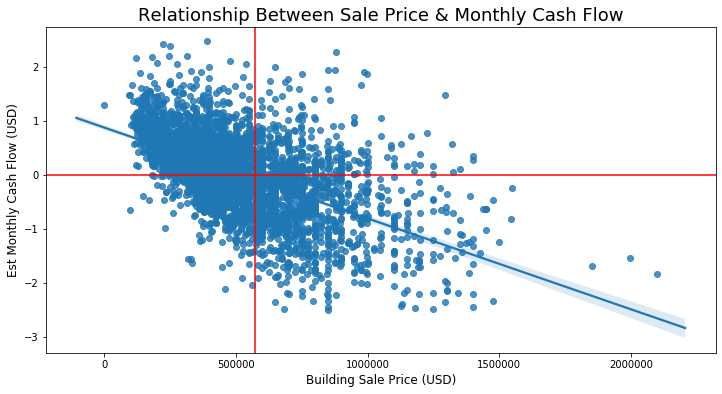

In [207]:
plt.subplots(figsize=(12,6))
sns.regplot(y_train, X_train_stand['Monthly_Profit'])
plt.title('Relationship Between Sale Price & Monthly Cash Flow', fontsize=18)
plt.xlabel('Building Sale Price (USD)', fontsize=12)
plt.ylabel('Est Monthly Cash Flow (USD)', fontsize=12)
plt.axhline(y=0, color='red')
plt.axvline(x=571000, color='red')
plt.plot()
plt.show()

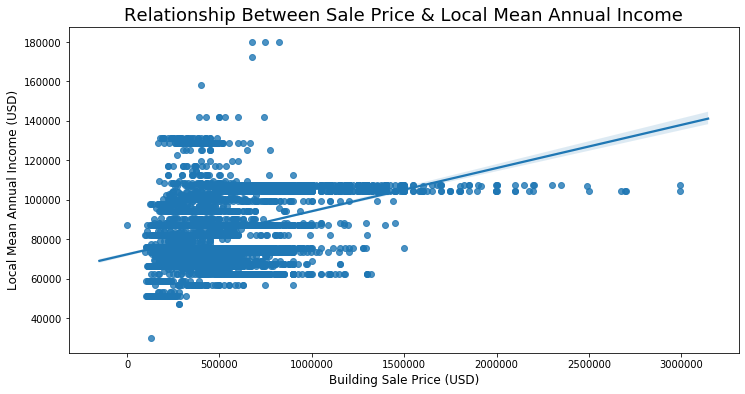

In [208]:
plt.subplots(figsize=(12,6))
sns.regplot(y, X['Mean Annual Income'])
plt.title('Relationship Between Sale Price & Local Mean Annual Income', fontsize=18)
plt.xlabel('Building Sale Price (USD)', fontsize=12)
plt.ylabel('Local Mean Annual Income (USD)', fontsize=12)
# plt.axhline(y=0, color='red')
# plt.axvline(x=571000, color='red')
plt.plot()
plt.show()

## Fitting the Regression Model to Training Set

In [209]:
# Instantiate the linear regression object lr
from sklearn.linear_model import LinearRegression, Lasso
lr = LinearRegression()

# Train the model using training data sets
lr.fit(X_train_stand, y_train)

# Predict on the test data
y_pred = lr.predict(X_test_stand)

## Model Slope & Intercept Terms
Each feature's slope in the model is given by lr.coef_, and the intercept term is given by lr.intercept_ 

In [210]:
# Compute model slopes and intercept

a_list = lr.coef_
b_list = lr.intercept_
print("Estimated Model Slopes, a:" , a_list)
print("Estimated Model Intercept, b:" , b_list) 

Estimated Model Slopes, a: [  68338.2076652    39553.93733815   10574.80379448   46425.61401739
   -8256.59693238   -1882.69694184   41207.6640102    50955.97666998
  -30058.5228782    49073.38493778   57726.50260362   93399.23450754
   12113.28372744   -2023.51923671  101011.37263699  139774.41862922
 -129596.65864228   24230.52880823 -129218.92467236  -43829.15053192
   50555.77595228  -11002.50530067  -24742.22670137   70648.75049162
   88319.91784213 -158136.74476186]
Estimated Model Intercept, b: 533853.3484375165


## Regression Metrics for Model Performance

Now, it is the time to evaluate model performance. 

For regression models, there are two ways to compute performance/accuracy; RMSE (Root Mean Squared Error), and R-Squared.

### RMSE

RMSE is the standard deviation of the residuals. So, RMSE gives us the standard deviation of the unexplained variance by the model. It can be calculated by taking the square root of Mean Squared Error.
RMSE is an absolute measure of fit. It describes the spread  of the residuals, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower standard deviation of residuals; i.e. lower values of RMSE. So, lower values of RMSE indicate better fit of data. 

In [211]:
# Calculate Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))


RMSE value: 194013.7236


###  R2 Score


R2 Score is another metric to evaluate performance of a regression model. It is also referred to as the coefficient of determination. It gives us the accuracy of fit for the linear regression model, and indicates the percentage of variance that is explained by the model. 

R2 = Explained Variation/Total Variation

In general, the higher the R2 value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1. Its value can become negative if our model is wrong.

In [212]:
# Calculate r2_score

from sklearn.metrics import r2_score
print ("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))


R2 Score value: 0.47


## Interpretation & Conclusion

In any business or investment decision, the benchmark for an acceptable R2 score value is 0.7. If the R2 score value >= 0.7, then the model is good enough to deploy on unseen data. Our R2 score value is 0.47, which can also be interpreted as "our model explains 47% of the variance in sale price". So, the R2 score value confirms that the model is not good enough to deploy because it does not provide a good fit to the data.

## Model Assumptions

The Linear Regression model is based on several assumptions which are listed below:-

### i.	Linear relationship


The relationship between response and feature variables should be linear. This linear relationship assumption can be tested by plotting a scatter-plot between response and feature variables.


### ii.	Multivariate normality

The linear regression model requires all variables to be multivariate normal. A multivariate normal distribution means a vector in multiple normally distributed variables, where any linear combination of the variables is also normally distributed.


### iii.	No or little multicollinearity

It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are highly correlated.


### iv.	No auto-correlation

Also, it is assumed that there is little or no auto-correlation in the data. Autocorrelation occurs when the residual errors are not independent from each other.


### v.	Homoscedasticity

Homoscedasticity describes a situation in which the error term (that is, the noise in the model) is the same across all values of the independent variables. It means the residuals are same across the regression line. It can be checked by looking at scatter plot.
